---
layout: post
title: python 决策树算法
category: math
tags: [math, ai, python]
---

决策树是一个树状结构决策图，根据对象属性用概率统计的方式预测结果。

决策树的难点是在已有数据样本的情况下如何生成决策树，一旦生成之后就是根据属性做 `if-else` 判断出结果即可。

本文使用 scikit-learn 中的 iris 的鸢尾花数据集作为例子来学习决策树算法。

鸢尾花数据集是包含150个样本的三种不同种类的鸢尾花，每个鸢尾花有4个属性特征。

四个特征：花萼长度(cm),花萼宽度(cm),花瓣长度(cm),花瓣宽度(cm)

三种鸢尾花：山鸢尾花(Iris Setosa), 变色鸢尾花(Iris Versicolor), 维吉尼亚鸢尾花(Iris Virginica)

关于鸢尾花数据集的详细介绍参考这篇文章：[探索sklearn 鸢尾花数据集](http://www.cnblogs.com/meelo/p/4272036.html)


In [22]:
%matplotlib inline
from sklearn.datasets import load_iris
import numpy as np
import matplotlib.pyplot as plt

# height = 12, width = 9
plt.rcParams["figure.figsize"] = [12, 9]

# 加载数据集
iris = load_iris()

# 数据特征：150行， 4列
feature = iris['data']

# 对应的鸢尾花种类: 150个，三种鸢尾花分别用 0,1,2 表示
target = iris['target']


# 4个特征的名称
feature_names = iris.feature_names
# ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
#   花萼长度，花萼宽度，花瓣长度，花瓣宽度
feature_names = ['花萼长度', '花萼宽度', '花瓣长度', '花瓣宽度']

# 三种鸢尾花的名称
class_names = iris.target_names
# ['setosa', 'versicolor', 'virginica']
# 山鸢尾花, 变色鸢尾花, 维吉尼亚鸢尾花
class_names = ['山鸢尾花', '变色鸢尾花', '维吉尼亚鸢尾花']

在使用上述的鸢尾花数据样本生成决策树之前，我们需要先了解几个概念。

## 信息熵

在信息论中，熵是接收的每条消息中包含的信息的平均量，又称为信息熵。离散随机变量的熵 H 定义为：

$$
H(X) = -\sum_i^n p_i(x) \log_2 p_i(x)
$$

熵表示信息的不确定性，熵越大知道的信息就越少。关于熵的理论这里不做过多介绍，我们只通过例子来理解加深理解。

对于鸢尾花来说，随机抽出一个鸢尾花，它到底属于哪一种鸢尾花就是不确定的。

我们通过数据集可知道三种鸢尾花的数量，每种鸢尾花的概率就是数量除以总数（这里总数是 150）。

In [23]:
# 三种鸢尾花数量
iris_count = np.zeros(3)

iris_count[0] = target[target == 0].size
iris_count[1] = target[target == 1].size
iris_count[2] = target[target == 2].size

print("三种鸢尾花的数量分别为：", iris_count)

# 计算每种鸢尾花的概率
iris_probability = np.divide(iris_count, 150)

print("三种莺尾花的概率为：", iris_probability)

# 根据公式算出鸢尾花的熵：
iris_h = -np.sum(iris_probability * np.log2(iris_probability))

print("鸢尾花的熵为：", iris_h)


三种鸢尾花的数量分别为： [50. 50. 50.]
三种莺尾花的概率为： [0.33333333 0.33333333 0.33333333]
鸢尾花的熵为： 1.584962500721156



在信息论中，熵的单位可以用 `bit` 表示。从上述结果可以看出，三种鸢尾花同等概率，熵为 1.5 bit。这跟我们程序设计时需要用多少位表示多少种状态的理论是类似的。

根据信息熵的数学公式，我们可以知道，所有概率 p(x) 都一样时熵（不确定性）最大。通俗点说就是，所有种类概率相等时，我们很难猜出一朵鸢尾花到底是哪一种。如果有一种鸢尾花的概率是百分之九十的话，我们不需要其他信息就可以猜出它属于那种花（不确定性相对较小）。

为了降低信息熵，我们需要引入更多的信息。决策树通过引入鸢尾花的属性（特征）的信息来降低信息熵。为了更好的识别出鸢尾花特征和种类之间的关系，通过以下代码呈现鸢尾花的四个特征分别与鸢尾花种类的散点图。

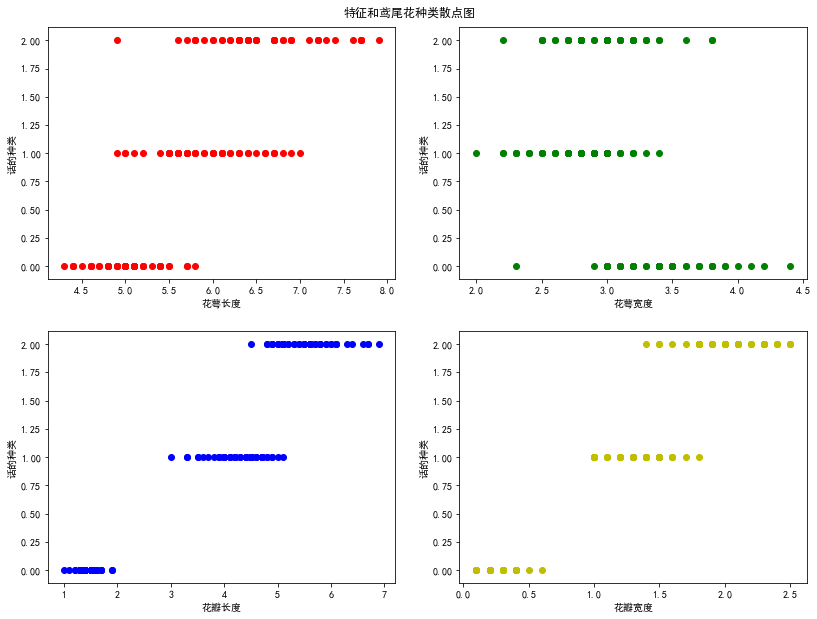

In [24]:
colors='rgby'

# 生成散点图
for i in range(4):
    plt.subplot(2, 2, i+1)
    plt.scatter(feature[:,i], target, c=colors[i])
    plt.xlabel(feature_names[i])
    plt.ylabel('话的种类')

plt.suptitle("特征和鸢尾花种类散点图")
# plt.legend(loc='lower right', borderpad=0)
plt.tight_layout(pad=3, w_pad=2, h_pad=2)
plt.show()

In [8]:
from sklearn.model_selection import train_test_split
from sklearn import tree

# 把样本分成训练集和测试集两部分, 两者比例为： 7:3
X_train, X_test, y_train, y_test = train_test_split(feature, target, test_size=0.3, random_state=42)

# 创建决策树分类器
clf = tree.DecisionTreeClassifier()

# 训练决策树
clf.fit(X=X_train, y=y_train)

# 查看特征比重
print("feature weight : ", clf.feature_importances_)

# 查看决策树评分
print("decision tree score : ", clf.score(X=X_test, y=y_test))


feature weight :  [0.01911002 0.         0.08757679 0.89331319]
decision tree score :  1.0


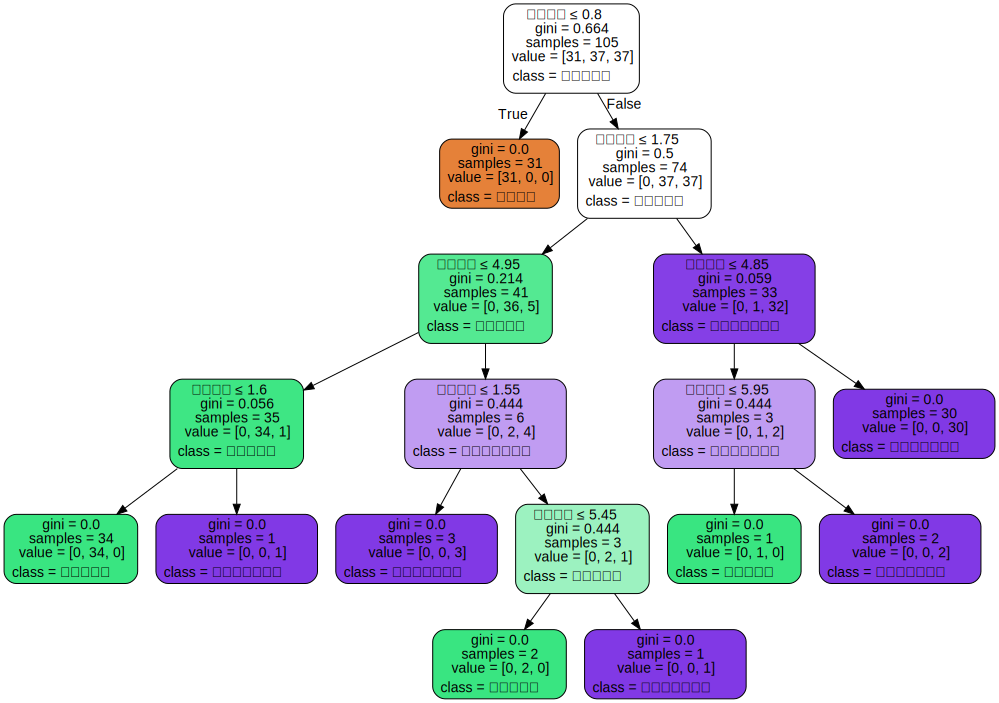

In [10]:
import graphviz

# 使用 graphviz 出决策树的图
dot_data = tree.export_graphviz(
    clf,
    out_file=None,
    feature_names=feature_names,
    class_names=class_names,
    filled=True,
    rounded=True,
    special_characters=True)

graph = graphviz.Source(dot_data)
graph